<a href="https://colab.research.google.com/github/Jaybhatt216/EIT/blob/main/Discrete_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#read a image like oandas read csv

In [2]:
I = plt.imread('panda.jpg')

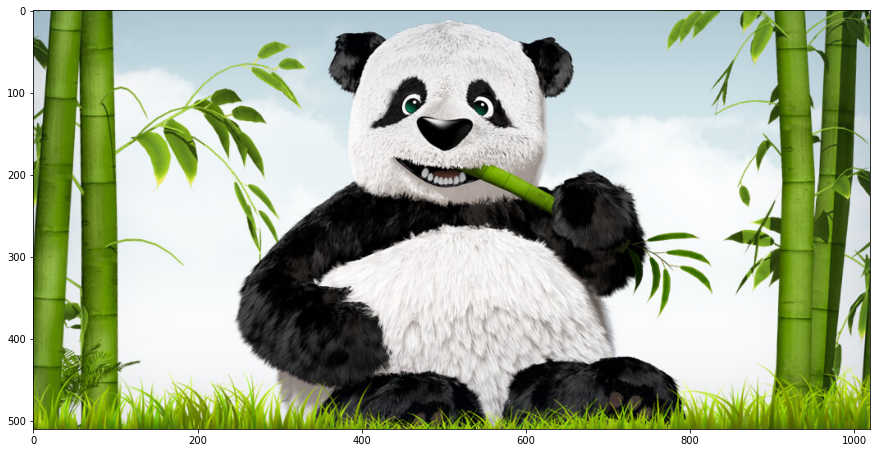

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(I)

In [4]:
type(I)

numpy.ndarray

In [5]:
I.shape

(510, 1020, 3)

#make black and white version

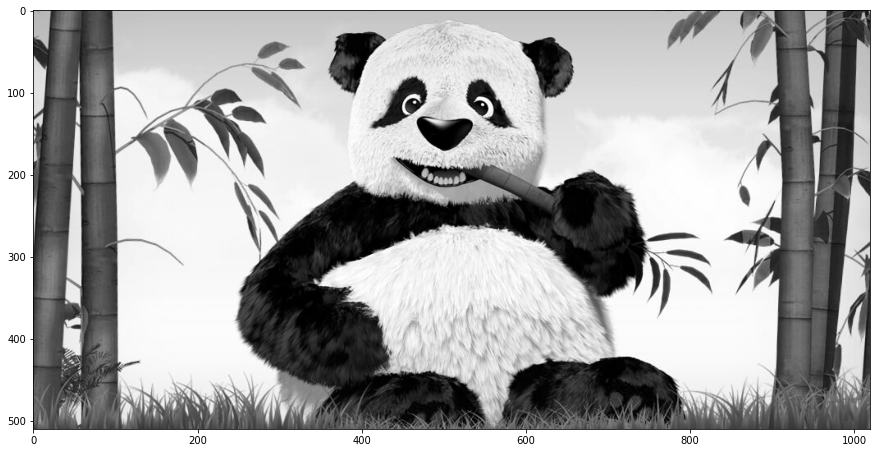

In [6]:
BW = np.mean(I,axis=2)
plt.figure(figsize=(15,10))
plt.imshow(BW,cmap='gray')

#simple  1.3 can be any number higer than 1
# increasing contrast
# any number below 1 will lower the contrast
# you can square it too

In [7]:
IContrast = (I*1.3/255)**2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


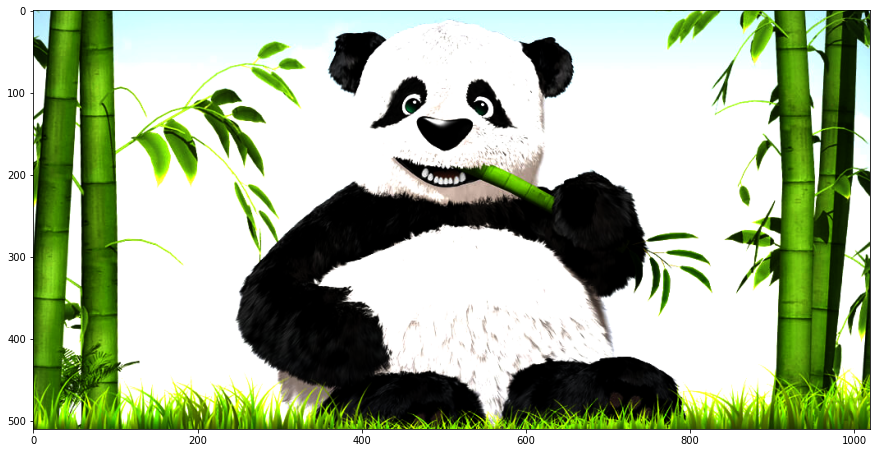

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(IContrast)

(array([220679., 126107.,  67717.,  60184.,  71901.,  67600.,  65390.,
        110578., 249863., 520581.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

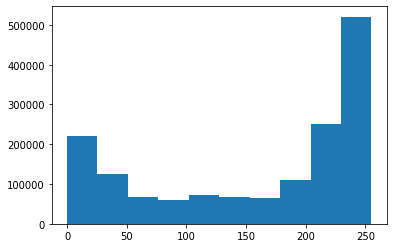

In [9]:
newI = I.flatten()

plt.hist(newI)

## Discrete convolution

In [10]:
def discrete2DConv(Image, flter, padding):
    paddedImage = np.pad(Image, padding, 'constant')
    flter = np.rot90(flter, 2)
    conv = np.empty(Image.shape)
    for i in range(paddedImage.shape[0]-flter.shape[0]):
        for j in range(paddedImage.shape[1]-flter.shape[1]):
            
            conv[i,j] = np.sum((paddedImage[i:i+flter.shape[0], j:j+flter.shape[1]])*flter)
    
    return conv

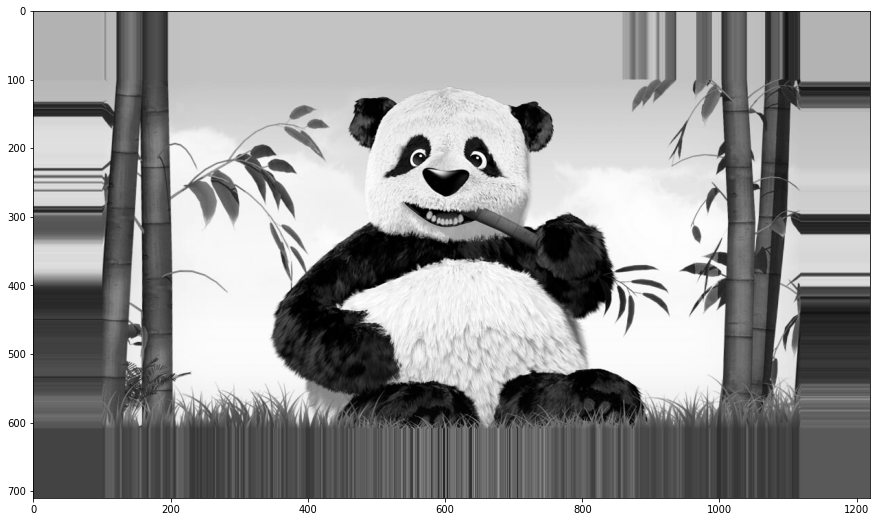

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(np.pad(BW,[100,100],'edge'),cmap='gray')

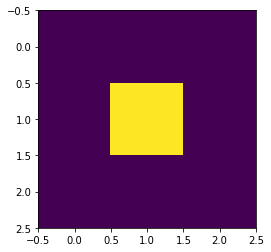

In [12]:
flter2D = np.array([[0,0,0],[0,1,0],[0,0,0]])
plt.imshow(flter2D)

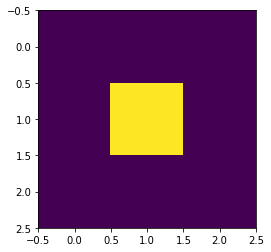

In [13]:
flterneg = np.array([[-1,-1,-1,],[-1,-1,-1,],[-1,-1,-1]])
plt.imshow(flter2D)

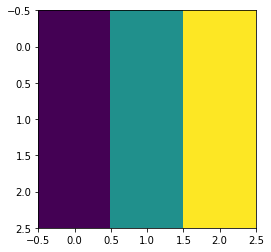

In [14]:
flter_right_edge = np.array([[-10,0,10],[-10,0,10],[-10,0,10]])
plt.imshow(flter_right_edge)

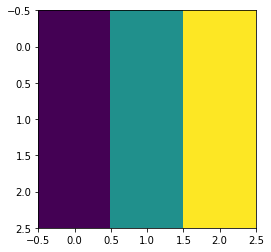

In [15]:
flter_left_edge = np.array([[10,0,-10],[10,0,-10],[10,0,-10]])
plt.imshow(flter_right_edge)

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:468: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:488: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


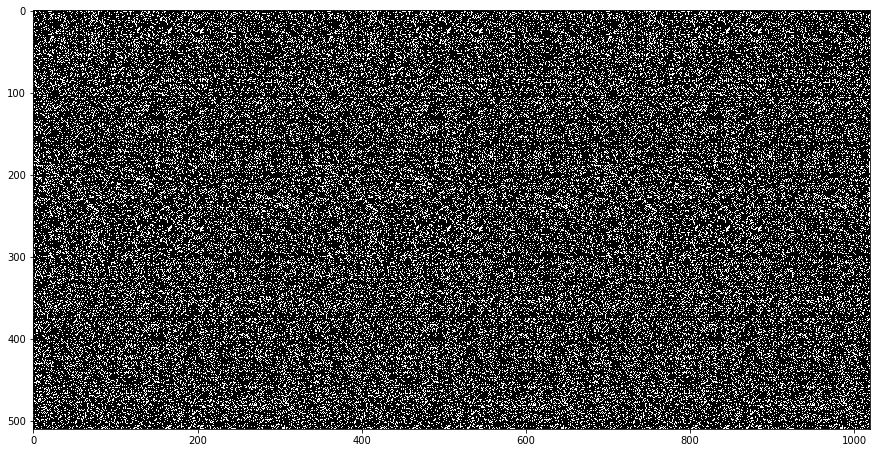

In [16]:
ImConv=discrete2DConv(BW,flter2D,1)
plt.figure(figsize=(15,10))
plt.imshow(ImConv,cmap='gray')